In [34]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [36]:
def train_test_data(X, y, names):
    X_train, X_test, y_train, y_test, names_train, names_test = train_test_split(X, y, names, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, names_train, names_test

In [59]:
from sklearn.metrics.pairwise import euclidean_distances

def image_retrieval_k(train_data, test_data, train_names, test_names, k=20, view_option=0):
    avg_precisions = []
    avg_recalls = []
    precisionsatk = []
    
    for idx, query in enumerate(test_data):
        
        all_precisions = []
        all_recalls = []
        precisions = []
        recalls = []

        # Finding the euclidean distance from the query image and sorting them into index
        query = query.reshape((1, -1))
        D = euclidean_distances(train_data, query).squeeze()
        index = np.argsort(D)
        
        # Finding the index of the last correct image in the sorted index to iter to
        last_correct_image_idx = 0
        for i in range(len(index)):
            if train_names[index[i]] == test_names[idx]:
                last_correct_image_idx = i
        
        # make sure we iter to k (for precision@k) if all correct images are found before k
        if k > last_correct_image_idx:
            last_correct_image_idx = k+1
        
        # Itering through all images untill we get to k or last correct image to compute AP
        for kk in range(1, last_correct_image_idx+2):
            TP = 0
            FP = 0
            FN = 0
            
            # Finding the correct amount of images in the training set
            correct_count = 0
            for ind in index:
                if train_names[ind] == test_names[idx]:
                    correct_count += 1
            sized_index = index[:kk]
            
            # Find TP FP FN
            for ind in sized_index:
                if train_names[ind] == test_names[idx]:
                    TP += 1
                else:
                    FP += 1
            FN = correct_count - TP
            
            # Creating image of k images (including query image at start)
            tmp = [query.reshape((32,32))]
            for ind in sized_index[:k]:
                tmp.append(train_data[ind].reshape((32,32)))
            output = np.array(tmp)*255
            output = output.transpose(1, 0, 2)
            output = output.reshape((32, -1))
            im_query = Image.fromarray(output)
            
            # If the last k image is a correct image we add precision to the list
            if train_names[sized_index[-1]] == test_names[idx]:
                precisions.append(TP/(TP+FP))
                recalls.append(TP/(TP+FN))

            # Adding all precisions and recalls to a seperate list
            all_precisions.append(TP/(TP+FP))
            all_recalls.append(TP/(TP+FN))
        
        # Solving AP, AR and precision@k
        avg_precisions.append(np.average(precisions))
        avg_recalls.append(np.average(all_recalls))
        precisionsatk.append(all_precisions[k-1])
        
        # Set a viewing option, if 1 we print out the following:
        if view_option == 1:
            display(im_query) 
            print("Label: {}".format(test_names[idx]))
            print("Average Precision for query {}: ".format(idx), avg_precisions[-1])
            print("Precision@k for query {}: ".format(idx), precisionsatk[-1])
            print("\n")
        
    return avg_precisions, avg_recalls, precisionsatk

Input for image_retrieval_k:
- X_train -> Training data (labelled X_train here)
- X_test -> Testing data (used for the queries, labelled as X_test here)
- names_train -> Object in the image names of each image in the training set
- names_test -> " " for the testing set
- k -> returns the precisions at that k value
- last number is the veiwing option:
    - 0 -> everything is hidden (just returns averages and precisions@k)
    - 1 -> prints the AP and precision@k for each query and query for k

Output:
- avg_precisions -> A list of all AP results
- avg_recalls -> A list of all AR results relating to the AP results
- precisionatk -> The precisions at the set k value in the input for each query

mAP can be solved by finding the average of the AP list (avg_precisions):
- Which should be = 0.575

In [32]:
def calculate_mAP(precisionsatk):
    mAP = np.average(AP)
    return mAP

In [28]:
import pandas
def save_data_to_csv(precisionsatk, AP, k):
    data = {'Precision@k': precisionsatk, 'Average Precision': AP}
    df = pandas.DataFrame(data=data)
    pandas.set_option("display.max_rows", 281, "display.max_columns", 4)
    df.to_csv('MPEG7-metrics_k={}.csv'.format(k))

# Code to Run Image Retrieval

In [39]:
# Data
X = np.load('MPEG7 code/imgs_array.npy')
y = np.load('MPEG7 code/y.npy')
names = np.load('MPEG7 code/names.npy')

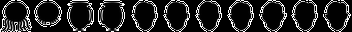

Label: octopus
Average Precision for query 0:  0.12875044405168948
Precision@k for query 0:  0.1




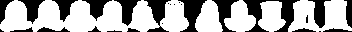

Label: hat
Average Precision for query 1:  0.7312703525976892
Precision@k for query 1:  0.9




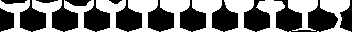

Label: Glas
Average Precision for query 2:  1.0
Precision@k for query 2:  1.0




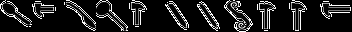

Label: spoon
Average Precision for query 3:  0.0989753017504791
Precision@k for query 3:  0.2




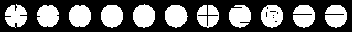

Label: device9
Average Precision for query 4:  0.8148557531073802
Precision@k for query 4:  1.0




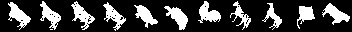

Label: cattle
Average Precision for query 5:  0.3236155245866718
Precision@k for query 5:  0.4




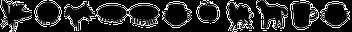

Label: fly
Average Precision for query 6:  0.020247319112208575
Precision@k for query 6:  0.0




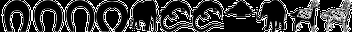

Label: horseshoe
Average Precision for query 7:  0.23254860458759616
Precision@k for query 7:  0.3




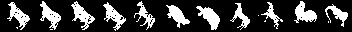

Label: cattle
Average Precision for query 8:  0.315842890461363
Precision@k for query 8:  0.3




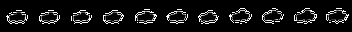

Label: car
Average Precision for query 9:  0.9407315674807935
Precision@k for query 9:  1.0




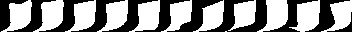

Label: Comma
Average Precision for query 10:  1.0
Precision@k for query 10:  1.0




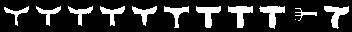

Label: device8
Average Precision for query 11:  0.851499705016846
Precision@k for query 11:  0.9




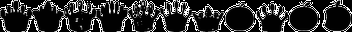

Label: crown
Average Precision for query 12:  0.44564466608262654
Precision@k for query 12:  0.7




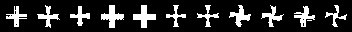

Label: device5
Average Precision for query 13:  0.8284594561338746
Precision@k for query 13:  1.0




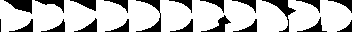

Label: HCircle
Average Precision for query 14:  0.9552429667519183
Precision@k for query 14:  1.0




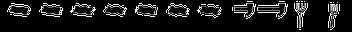

Label: brick
Average Precision for query 15:  0.4082352339971021
Precision@k for query 15:  0.6




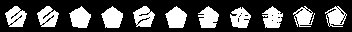

Label: device6
Average Precision for query 16:  0.6443245095999943
Precision@k for query 16:  1.0




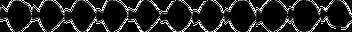

Label: flatfish
Average Precision for query 17:  0.9202158433466845
Precision@k for query 17:  1.0




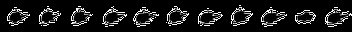

Label: chopper
Average Precision for query 18:  0.9542355371900826
Precision@k for query 18:  0.9




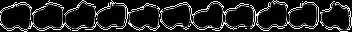

Label: shoe
Average Precision for query 19:  0.9052673544795216
Precision@k for query 19:  1.0




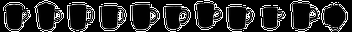

Label: cup
Average Precision for query 20:  0.8500059376897612
Precision@k for query 20:  0.9




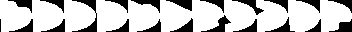

Label: HCircle
Average Precision for query 21:  1.0
Precision@k for query 21:  1.0




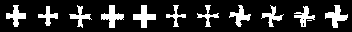

Label: device5
Average Precision for query 22:  0.8581904501462929
Precision@k for query 22:  1.0




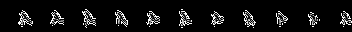

Label: stef
Average Precision for query 23:  1.0
Precision@k for query 23:  1.0




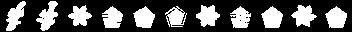

Label: lmfish
Average Precision for query 24:  0.12345644052045349
Precision@k for query 24:  0.1




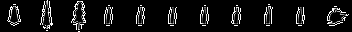

Label: bell
Average Precision for query 25:  0.00816938363377105
Precision@k for query 25:  0.0




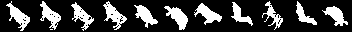

Label: cattle
Average Precision for query 26:  0.3581172710909705
Precision@k for query 26:  0.4




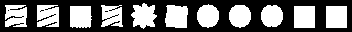

Label: device3
Average Precision for query 27:  0.6567674770539064
Precision@k for query 27:  0.6




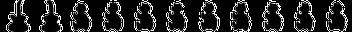

Label: guitar
Average Precision for query 28:  0.08435623666067364
Precision@k for query 28:  0.1




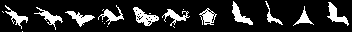

Label: horse
Average Precision for query 29:  0.11200899244125578
Precision@k for query 29:  0.1




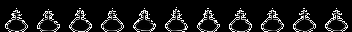

Label: fountain
Average Precision for query 30:  1.0
Precision@k for query 30:  1.0




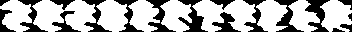

Label: Misk
Average Precision for query 31:  0.9829505135387488
Precision@k for query 31:  1.0




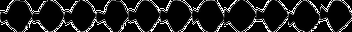

Label: flatfish
Average Precision for query 32:  0.9163592089728453
Precision@k for query 32:  1.0




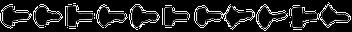

Label: key
Average Precision for query 33:  1.0
Precision@k for query 33:  1.0




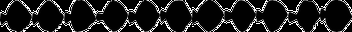

Label: flatfish
Average Precision for query 34:  0.8915194653831017
Precision@k for query 34:  1.0




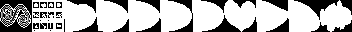

Label: spring
Average Precision for query 35:  0.01329168365554722
Precision@k for query 35:  0.0




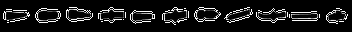

Label: pencil
Average Precision for query 36:  0.40261750736679425
Precision@k for query 36:  0.6




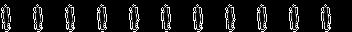

Label: children
Average Precision for query 37:  1.0
Precision@k for query 37:  1.0




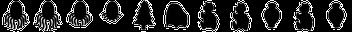

Label: octopus
Average Precision for query 38:  0.28363027339474106
Precision@k for query 38:  0.3




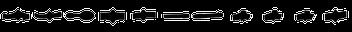

Label: watch
Average Precision for query 39:  0.3481378782932128
Precision@k for query 39:  0.4




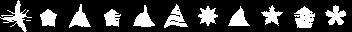

Label: fly
Average Precision for query 40:  0.014985578159539473
Precision@k for query 40:  0.0




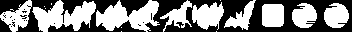

Label: butterfly
Average Precision for query 41:  0.10397982549599871
Precision@k for query 41:  0.1




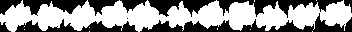

Label: fish
Average Precision for query 42:  0.8381984741027294
Precision@k for query 42:  1.0




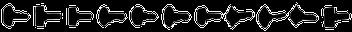

Label: key
Average Precision for query 43:  1.0
Precision@k for query 43:  1.0




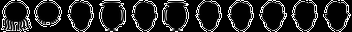

Label: octopus
Average Precision for query 44:  0.1311374294373602
Precision@k for query 44:  0.1




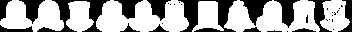

Label: hat
Average Precision for query 45:  0.781961281369675
Precision@k for query 45:  0.9




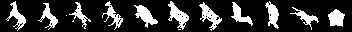

Label: horse
Average Precision for query 46:  0.24837890430463852
Precision@k for query 46:  0.4




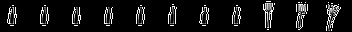

Label: bottle
Average Precision for query 47:  0.5101433258674931
Precision@k for query 47:  0.7




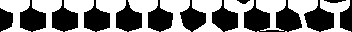

Label: Glas
Average Precision for query 48:  1.0
Precision@k for query 48:  1.0




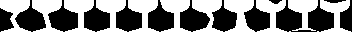

Label: Glas
Average Precision for query 49:  1.0
Precision@k for query 49:  1.0




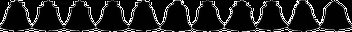

Label: bell
Average Precision for query 50:  0.8734005762057587
Precision@k for query 50:  1.0




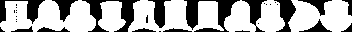

Label: hat
Average Precision for query 51:  0.7932610521596133
Precision@k for query 51:  0.9




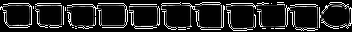

Label: cellular_phone
Average Precision for query 52:  0.9567890442890442
Precision@k for query 52:  0.9




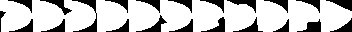

Label: HCircle
Average Precision for query 53:  1.0
Precision@k for query 53:  1.0




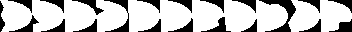

Label: HCircle
Average Precision for query 54:  0.931547619047619
Precision@k for query 54:  1.0




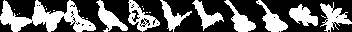

Label: butterfly
Average Precision for query 55:  0.3195193414344245
Precision@k for query 55:  0.3




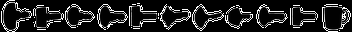

Label: key
Average Precision for query 56:  0.8443285437966288
Precision@k for query 56:  0.9




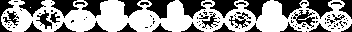

Label: pocket
Average Precision for query 57:  0.5083044013506548
Precision@k for query 57:  0.7




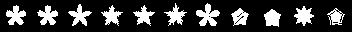

Label: device0
Average Precision for query 58:  0.4525124225930033
Precision@k for query 58:  0.6




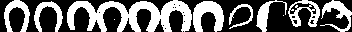

Label: horseshoe
Average Precision for query 59:  0.5047710893262533
Precision@k for query 59:  0.7




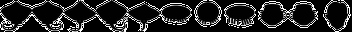

Label: ray
Average Precision for query 60:  0.37034146466931084
Precision@k for query 60:  0.4




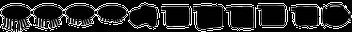

Label: octopus
Average Precision for query 61:  0.26179877052347794
Precision@k for query 61:  0.3




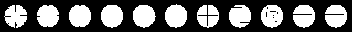

Label: device9
Average Precision for query 62:  0.8164917585970218
Precision@k for query 62:  1.0




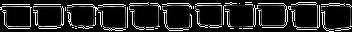

Label: cellular_phone
Average Precision for query 63:  0.9493589743589743
Precision@k for query 63:  1.0




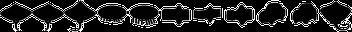

Label: ray
Average Precision for query 64:  0.22781207145613847
Precision@k for query 64:  0.3




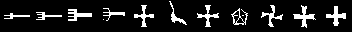

Label: fork
Average Precision for query 65:  0.24282273575573846
Precision@k for query 65:  0.3




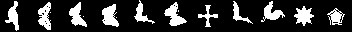

Label: bird
Average Precision for query 66:  0.011879016362443508
Precision@k for query 66:  0.0




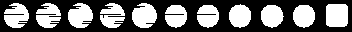

Label: device9
Average Precision for query 67:  0.8862433862433863
Precision@k for query 67:  0.9




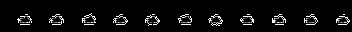

Label: truck
Average Precision for query 68:  0.9116878762999453
Precision@k for query 68:  1.0




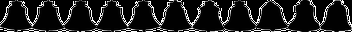

Label: bell
Average Precision for query 69:  0.8742654591092568
Precision@k for query 69:  1.0




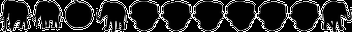

Label: elephant
Average Precision for query 70:  0.24461697314456324
Precision@k for query 70:  0.3




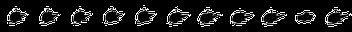

Label: chopper
Average Precision for query 71:  0.9290209790209792
Precision@k for query 71:  0.9




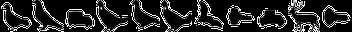

Label: bird
Average Precision for query 72:  0.247805949745108
Precision@k for query 72:  0.4




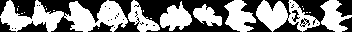

Label: butterfly
Average Precision for query 73:  0.17458786300291376
Precision@k for query 73:  0.3




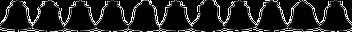

Label: bell
Average Precision for query 74:  0.868412892222416
Precision@k for query 74:  1.0




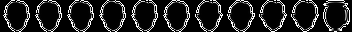

Label: face
Average Precision for query 75:  0.7730405363899946
Precision@k for query 75:  0.9




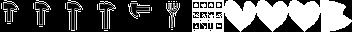

Label: hammer
Average Precision for query 76:  0.2629323991845943
Precision@k for query 76:  0.4




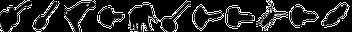

Label: guitar
Average Precision for query 77:  0.013582432829661198
Precision@k for query 77:  0.0




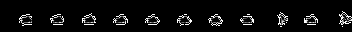

Label: truck
Average Precision for query 78:  0.6960393399233639
Precision@k for query 78:  0.8




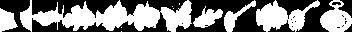

Label: Glas
Average Precision for query 79:  0.015969612260418372
Precision@k for query 79:  0.0




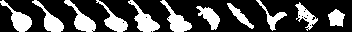

Label: guitar
Average Precision for query 80:  0.3600538317187067
Precision@k for query 80:  0.5




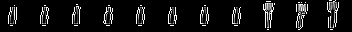

Label: bottle
Average Precision for query 81:  0.5101470150585546
Precision@k for query 81:  0.7




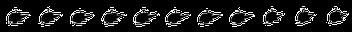

Label: chopper
Average Precision for query 82:  0.9924242424242423
Precision@k for query 82:  1.0




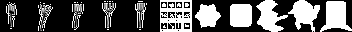

Label: fork
Average Precision for query 83:  0.3203896988350162
Precision@k for query 83:  0.4




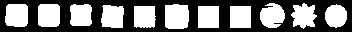

Label: device3
Average Precision for query 84:  0.6938672324516244
Precision@k for query 84:  0.7




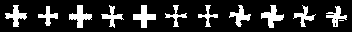

Label: device5
Average Precision for query 85:  0.8872089743991476
Precision@k for query 85:  1.0




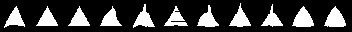

Label: device4
Average Precision for query 86:  0.9555444748749703
Precision@k for query 86:  1.0




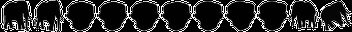

Label: elephant
Average Precision for query 87:  0.19772625308809236
Precision@k for query 87:  0.3




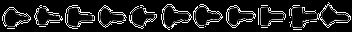

Label: key
Average Precision for query 88:  0.868283440697234
Precision@k for query 88:  1.0




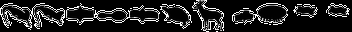

Label: lizzard
Average Precision for query 89:  0.07465785886381186
Precision@k for query 89:  0.1




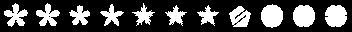

Label: device0
Average Precision for query 90:  0.44992600323529214
Precision@k for query 90:  0.6




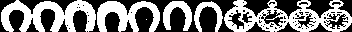

Label: horseshoe
Average Precision for query 91:  0.47995833798737497
Precision@k for query 91:  0.6




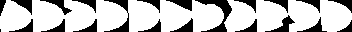

Label: HCircle
Average Precision for query 92:  0.9520408163265307
Precision@k for query 92:  1.0




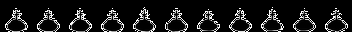

Label: fountain
Average Precision for query 93:  1.0
Precision@k for query 93:  1.0




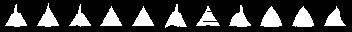

Label: device4
Average Precision for query 94:  0.9734258286647992
Precision@k for query 94:  1.0




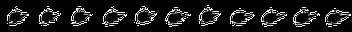

Label: chopper
Average Precision for query 95:  1.0
Precision@k for query 95:  1.0




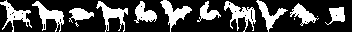

Label: horse
Average Precision for query 96:  0.17531854407142447
Precision@k for query 96:  0.3




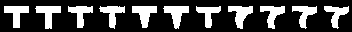

Label: device8
Average Precision for query 97:  0.9387936610608021
Precision@k for query 97:  1.0




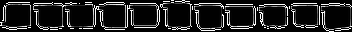

Label: cellular_phone
Average Precision for query 98:  0.9443535188216039
Precision@k for query 98:  1.0




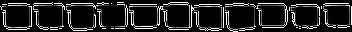

Label: cellular_phone
Average Precision for query 99:  0.9695730363151177
Precision@k for query 99:  1.0




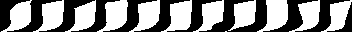

Label: Comma
Average Precision for query 100:  1.0
Precision@k for query 100:  1.0




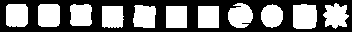

Label: device3
Average Precision for query 101:  0.6730077330077331
Precision@k for query 101:  0.7




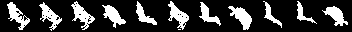

Label: cattle
Average Precision for query 102:  0.26853704567669695
Precision@k for query 102:  0.3




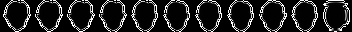

Label: face
Average Precision for query 103:  0.7971979860524752
Precision@k for query 103:  0.9




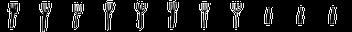

Label: fork
Average Precision for query 104:  0.6298789770999952
Precision@k for query 104:  0.7




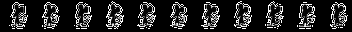

Label: rat
Average Precision for query 105:  0.9453365051045695
Precision@k for query 105:  1.0




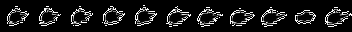

Label: chopper
Average Precision for query 106:  0.9316525579683476
Precision@k for query 106:  0.9




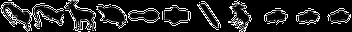

Label: lizzard
Average Precision for query 107:  0.07410395671373177
Precision@k for query 107:  0.1




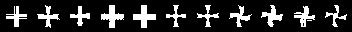

Label: device5
Average Precision for query 108:  0.828705109950957
Precision@k for query 108:  1.0




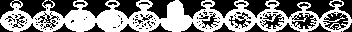

Label: pocket
Average Precision for query 109:  0.7475794319410516
Precision@k for query 109:  0.9




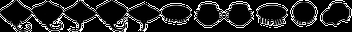

Label: ray
Average Precision for query 110:  0.37046774959985024
Precision@k for query 110:  0.4




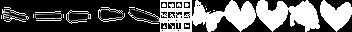

Label: fork
Average Precision for query 111:  0.012276548785616757
Precision@k for query 111:  0.0




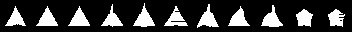

Label: device4
Average Precision for query 112:  0.9263085453633054
Precision@k for query 112:  0.8




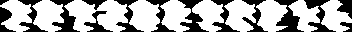

Label: Misk
Average Precision for query 113:  0.975
Precision@k for query 113:  1.0




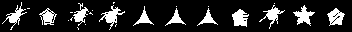

Label: beetle
Average Precision for query 114:  0.1273771169785219
Precision@k for query 114:  0.3




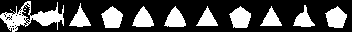

Label: butterfly
Average Precision for query 115:  0.049835560570627276
Precision@k for query 115:  0.0




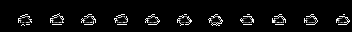

Label: truck
Average Precision for query 116:  0.9301005747126436
Precision@k for query 116:  1.0




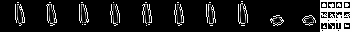

Label: bottle
Average Precision for query 117:  0.5102779728825799
Precision@k for query 117:  0.7




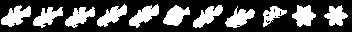

Label: lmfish
Average Precision for query 118:  0.39451910310504035
Precision@k for query 118:  0.6




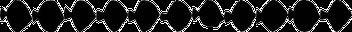

Label: flatfish
Average Precision for query 119:  0.9297301771229929
Precision@k for query 119:  1.0




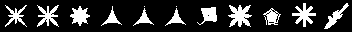

Label: device2
Average Precision for query 120:  0.2825613709306163
Precision@k for query 120:  0.4




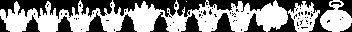

Label: crown
Average Precision for query 121:  0.5032658780508332
Precision@k for query 121:  0.8




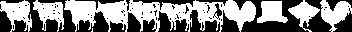

Label: cattle
Average Precision for query 122:  0.5342568017128589
Precision@k for query 122:  0.6




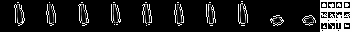

Label: bottle
Average Precision for query 123:  0.5100367381004783
Precision@k for query 123:  0.7




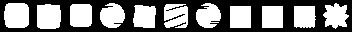

Label: device3
Average Precision for query 124:  0.5725528416602031
Precision@k for query 124:  0.7




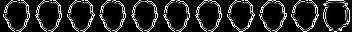

Label: face
Average Precision for query 125:  0.8173514105683224
Precision@k for query 125:  0.9




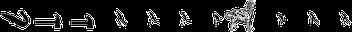

Label: sea_snake
Average Precision for query 126:  0.016645978065413843
Precision@k for query 126:  0.0




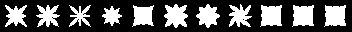

Label: device2
Average Precision for query 127:  0.6252993537594986
Precision@k for query 127:  0.6




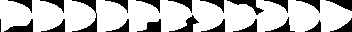

Label: HCircle
Average Precision for query 128:  0.9952380952380953
Precision@k for query 128:  1.0




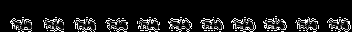

Label: carriage
Average Precision for query 129:  0.9916743613419512
Precision@k for query 129:  1.0




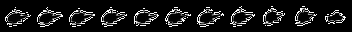

Label: chopper
Average Precision for query 130:  0.9171122994652406
Precision@k for query 130:  0.9




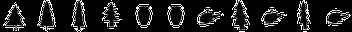

Label: tree
Average Precision for query 131:  0.45748798158895215
Precision@k for query 131:  0.5




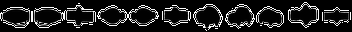

Label: jar
Average Precision for query 132:  0.25582871760301396
Precision@k for query 132:  0.3




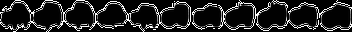

Label: personal_car
Average Precision for query 133:  0.47178999269252214
Precision@k for query 133:  0.4




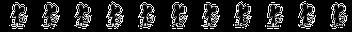

Label: rat
Average Precision for query 134:  0.9453365051045695
Precision@k for query 134:  1.0




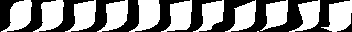

Label: Comma
Average Precision for query 135:  1.0
Precision@k for query 135:  1.0




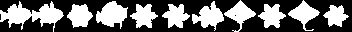

Label: fish
Average Precision for query 136:  0.2828479891285646
Precision@k for query 136:  0.3




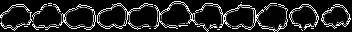

Label: personal_car
Average Precision for query 137:  0.4130214875150282
Precision@k for query 137:  0.6




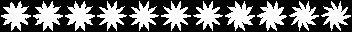

Label: device7
Average Precision for query 138:  0.8509535227846597
Precision@k for query 138:  1.0




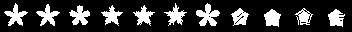

Label: device0
Average Precision for query 139:  0.45065801199971073
Precision@k for query 139:  0.6




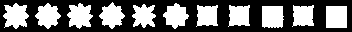

Label: device2
Average Precision for query 140:  0.45319481375898507
Precision@k for query 140:  0.5




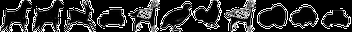

Label: dog
Average Precision for query 141:  0.1662050349393743
Precision@k for query 141:  0.3




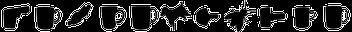

Label: key
Average Precision for query 142:  0.19973511020859983
Precision@k for query 142:  0.2




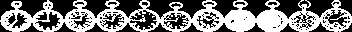

Label: pocket
Average Precision for query 143:  0.8804375699716035
Precision@k for query 143:  1.0




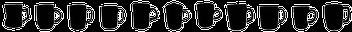

Label: cup
Average Precision for query 144:  0.8470822041553749
Precision@k for query 144:  1.0




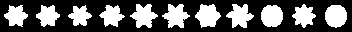

Label: device1
Average Precision for query 145:  0.6282204603791809
Precision@k for query 145:  0.7




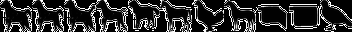

Label: dog
Average Precision for query 146:  0.3222061837952856
Precision@k for query 146:  0.4




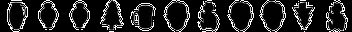

Label: jar
Average Precision for query 147:  0.22259143296019196
Precision@k for query 147:  0.2




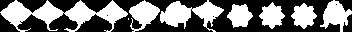

Label: ray
Average Precision for query 148:  0.44940027281677525
Precision@k for query 148:  0.5




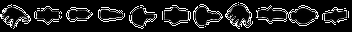

Label: elephant
Average Precision for query 149:  0.018006072299408836
Precision@k for query 149:  0.1




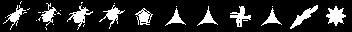

Label: beetle
Average Precision for query 150:  0.2175887750082274
Precision@k for query 150:  0.3




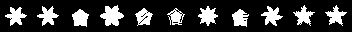

Label: device1
Average Precision for query 151:  0.25912635546337126
Precision@k for query 151:  0.3




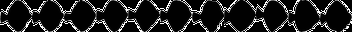

Label: flatfish
Average Precision for query 152:  0.9297633236846586
Precision@k for query 152:  1.0




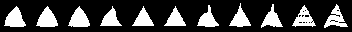

Label: device4
Average Precision for query 153:  0.872333172147002
Precision@k for query 153:  1.0




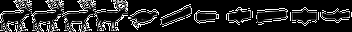

Label: deer
Average Precision for query 154:  0.19257617898476787
Precision@k for query 154:  0.3




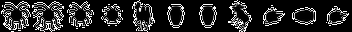

Label: octopus
Average Precision for query 155:  0.2632125132366122
Precision@k for query 155:  0.3




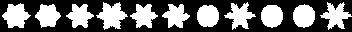

Label: device1
Average Precision for query 156:  0.5459082360731821
Precision@k for query 156:  0.7




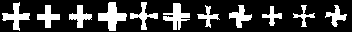

Label: device5
Average Precision for query 157:  1.0
Precision@k for query 157:  1.0




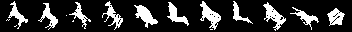

Label: horse
Average Precision for query 158:  0.2514008851326529
Precision@k for query 158:  0.4




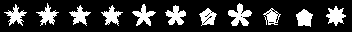

Label: device0
Average Precision for query 159:  0.4420881505223909
Precision@k for query 159:  0.6




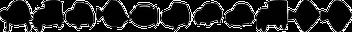

Label: turtle
Average Precision for query 160:  0.015433943960441922
Precision@k for query 160:  0.0




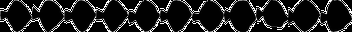

Label: flatfish
Average Precision for query 161:  0.9297506738544474
Precision@k for query 161:  1.0




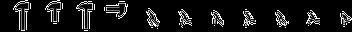

Label: hammer
Average Precision for query 162:  0.20019110315220426
Precision@k for query 162:  0.3




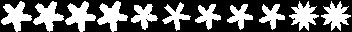

Label: device0
Average Precision for query 163:  0.5905199426951969
Precision@k for query 163:  0.8




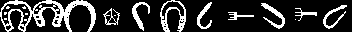

Label: horseshoe
Average Precision for query 164:  0.2534350357031178
Precision@k for query 164:  0.3




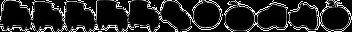

Label: classic
Average Precision for query 165:  0.36092010366478067
Precision@k for query 165:  0.5




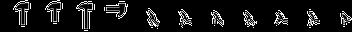

Label: hammer
Average Precision for query 166:  0.20029127710870345
Precision@k for query 166:  0.3




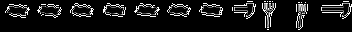

Label: brick
Average Precision for query 167:  0.40787195135276616
Precision@k for query 167:  0.6




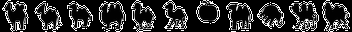

Label: camel
Average Precision for query 168:  0.6170584951706217
Precision@k for query 168:  0.8




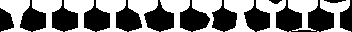

Label: Glas
Average Precision for query 169:  1.0
Precision@k for query 169:  1.0




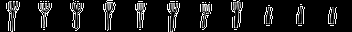

Label: fork
Average Precision for query 170:  0.5880286931293921
Precision@k for query 170:  0.7




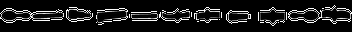

Label: spoon
Average Precision for query 171:  0.022494683655528765
Precision@k for query 171:  0.1




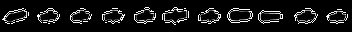

Label: pencil
Average Precision for query 172:  0.11898679642101354
Precision@k for query 172:  0.2




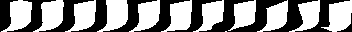

Label: Comma
Average Precision for query 173:  1.0
Precision@k for query 173:  1.0




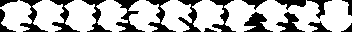

Label: Misk
Average Precision for query 174:  0.912860896413528
Precision@k for query 174:  0.9




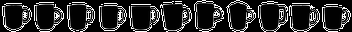

Label: cup
Average Precision for query 175:  0.8716592353031231
Precision@k for query 175:  1.0




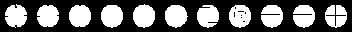

Label: device9
Average Precision for query 176:  0.818056823681004
Precision@k for query 176:  1.0




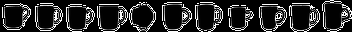

Label: cup
Average Precision for query 177:  0.8022336017740429
Precision@k for query 177:  0.9




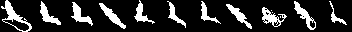

Label: lizzard
Average Precision for query 178:  0.02393747795507205
Precision@k for query 178:  0.1




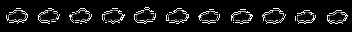

Label: car
Average Precision for query 179:  0.9299639473014086
Precision@k for query 179:  1.0




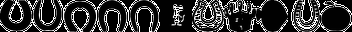

Label: horseshoe
Average Precision for query 180:  0.3800927984881408
Precision@k for query 180:  0.6




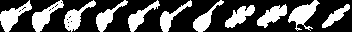

Label: guitar
Average Precision for query 181:  0.41298722204709243
Precision@k for query 181:  0.6




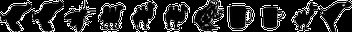

Label: chicken
Average Precision for query 182:  0.08121510308614362
Precision@k for query 182:  0.1




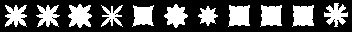

Label: device2
Average Precision for query 183:  0.7428082718794792
Precision@k for query 183:  0.6




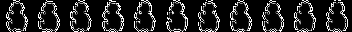

Label: teddy
Average Precision for query 184:  1.0
Precision@k for query 184:  1.0




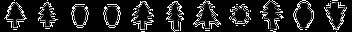

Label: tree
Average Precision for query 185:  0.46036821014047447
Precision@k for query 185:  0.6




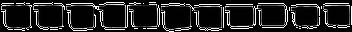

Label: cellular_phone
Average Precision for query 186:  0.9685314685314685
Precision@k for query 186:  1.0




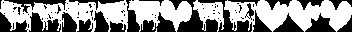

Label: cattle
Average Precision for query 187:  0.5115783884959098
Precision@k for query 187:  0.6




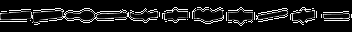

Label: pencil
Average Precision for query 188:  0.325505349315094
Precision@k for query 188:  0.4




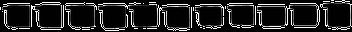

Label: cellular_phone
Average Precision for query 189:  0.9819004524886878
Precision@k for query 189:  1.0




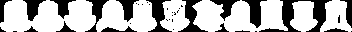

Label: hat
Average Precision for query 190:  0.7431308942265178
Precision@k for query 190:  0.9




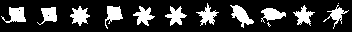

Label: ray
Average Precision for query 191:  0.16407155521044306
Precision@k for query 191:  0.2




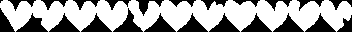

Label: Heart
Average Precision for query 192:  1.0
Precision@k for query 192:  1.0




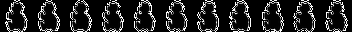

Label: teddy
Average Precision for query 193:  1.0
Precision@k for query 193:  1.0




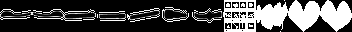

Label: spoon
Average Precision for query 194:  0.07380209269930996
Precision@k for query 194:  0.1




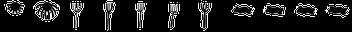

Label: octopus
Average Precision for query 195:  0.08607057055005712
Precision@k for query 195:  0.1




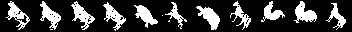

Label: cattle
Average Precision for query 196:  0.304234424441827
Precision@k for query 196:  0.3




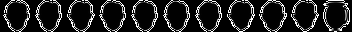

Label: face
Average Precision for query 197:  0.8331401248740603
Precision@k for query 197:  0.9




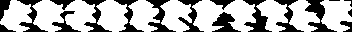

Label: Misk
Average Precision for query 198:  0.8916594045025418
Precision@k for query 198:  1.0




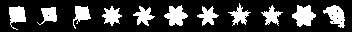

Label: ray
Average Precision for query 199:  0.19553294670115556
Precision@k for query 199:  0.2




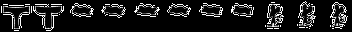

Label: device8
Average Precision for query 200:  0.11035721206591206
Precision@k for query 200:  0.1




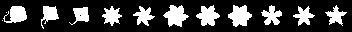

Label: ray
Average Precision for query 201:  0.19754083975088604
Precision@k for query 201:  0.2




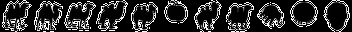

Label: camel
Average Precision for query 202:  0.4920073902565271
Precision@k for query 202:  0.6




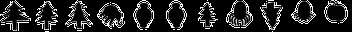

Label: tree
Average Precision for query 203:  0.41988650563064844
Precision@k for query 203:  0.4




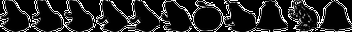

Label: frog
Average Precision for query 204:  0.43969376649318515
Precision@k for query 204:  0.7




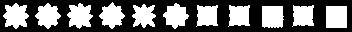

Label: device2
Average Precision for query 205:  0.45380517750437893
Precision@k for query 205:  0.5




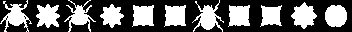

Label: beetle
Average Precision for query 206:  0.11090129046200947
Precision@k for query 206:  0.2




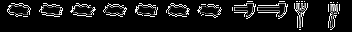

Label: brick
Average Precision for query 207:  0.40799962471418927
Precision@k for query 207:  0.6




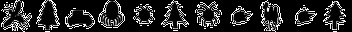

Label: fly
Average Precision for query 208:  0.021478769854252407
Precision@k for query 208:  0.0




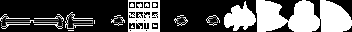

Label: hammer
Average Precision for query 209:  0.13841189911209467
Precision@k for query 209:  0.2




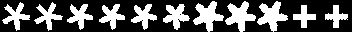

Label: device0
Average Precision for query 210:  0.5943857629287175
Precision@k for query 210:  0.8




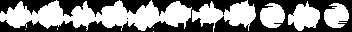

Label: fish
Average Precision for query 211:  0.7065295769902841
Precision@k for query 211:  0.8




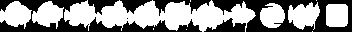

Label: fish
Average Precision for query 212:  0.6717945475866397
Precision@k for query 212:  0.8




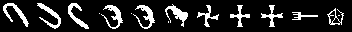

Label: sea_snake
Average Precision for query 213:  0.21112652938497467
Precision@k for query 213:  0.2




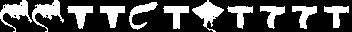

Label: lizzard
Average Precision for query 214:  0.08995188293568904
Precision@k for query 214:  0.1




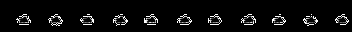

Label: truck
Average Precision for query 215:  1.0
Precision@k for query 215:  1.0




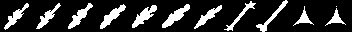

Label: lmfish
Average Precision for query 216:  0.40117632277910764
Precision@k for query 216:  0.6




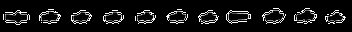

Label: watch
Average Precision for query 217:  0.048435748104124966
Precision@k for query 217:  0.0




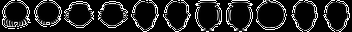

Label: octopus
Average Precision for query 218:  0.16085259062949359
Precision@k for query 218:  0.1




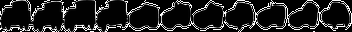

Label: classic
Average Precision for query 219:  0.25466459569857963
Precision@k for query 219:  0.3




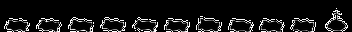

Label: brick
Average Precision for query 220:  0.6069186314657931
Precision@k for query 220:  0.9




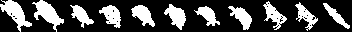

Label: turtle
Average Precision for query 221:  0.4502921022603237
Precision@k for query 221:  0.7




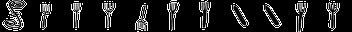

Label: spring
Average Precision for query 222:  0.012604831363722133
Precision@k for query 222:  0.0




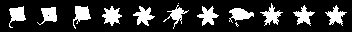

Label: ray
Average Precision for query 223:  0.19435338610019215
Precision@k for query 223:  0.2




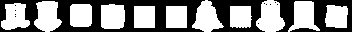

Label: hat
Average Precision for query 224:  0.2968342752723265
Precision@k for query 224:  0.3




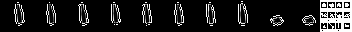

Label: bottle
Average Precision for query 225:  0.5100549821120265
Precision@k for query 225:  0.7




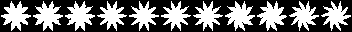

Label: device7
Average Precision for query 226:  0.849831198855088
Precision@k for query 226:  1.0




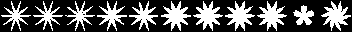

Label: device7
Average Precision for query 227:  0.7592918993784017
Precision@k for query 227:  0.9




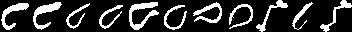

Label: sea_snake
Average Precision for query 228:  0.6408281697224121
Precision@k for query 228:  0.8




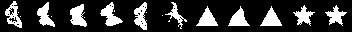

Label: butterfly
Average Precision for query 229:  0.32605794252156844
Precision@k for query 229:  0.4




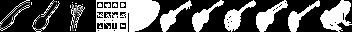

Label: spoon
Average Precision for query 230:  0.0741302365114539
Precision@k for query 230:  0.1




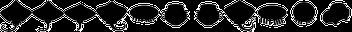

Label: ray
Average Precision for query 231:  0.33157198140152316
Precision@k for query 231:  0.4




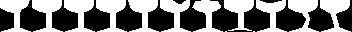

Label: Glas
Average Precision for query 232:  1.0
Precision@k for query 232:  1.0




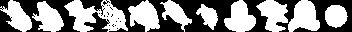

Label: frog
Average Precision for query 233:  0.1066833629221016
Precision@k for query 233:  0.2




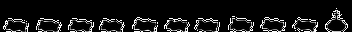

Label: brick
Average Precision for query 234:  0.6069392978368799
Precision@k for query 234:  0.9




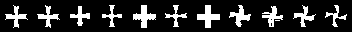

Label: device5
Average Precision for query 235:  0.8674646447251522
Precision@k for query 235:  1.0




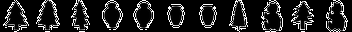

Label: tree
Average Precision for query 236:  0.3410474305555258
Precision@k for query 236:  0.4




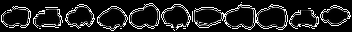

Label: shoe
Average Precision for query 237:  0.23754521047283234
Precision@k for query 237:  0.3




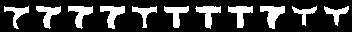

Label: device8
Average Precision for query 238:  0.9387936610608021
Precision@k for query 238:  1.0




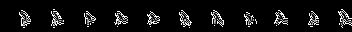

Label: stef
Average Precision for query 239:  0.8928368889841705
Precision@k for query 239:  1.0




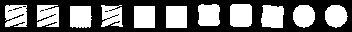

Label: device3
Average Precision for query 240:  0.8097869220151829
Precision@k for query 240:  0.8




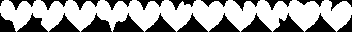

Label: Heart
Average Precision for query 241:  1.0
Precision@k for query 241:  1.0




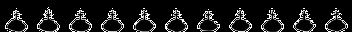

Label: fountain
Average Precision for query 242:  1.0
Precision@k for query 242:  1.0




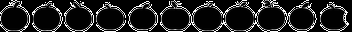

Label: apple
Average Precision for query 243:  0.8107303324694629
Precision@k for query 243:  1.0




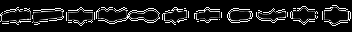

Label: watch
Average Precision for query 244:  0.5271510303863245
Precision@k for query 244:  0.7




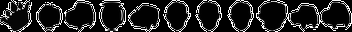

Label: crown
Average Precision for query 245:  0.01856022837438931
Precision@k for query 245:  0.0




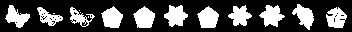

Label: butterfly
Average Precision for query 246:  0.18368731094765495
Precision@k for query 246:  0.2




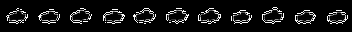

Label: car
Average Precision for query 247:  0.9237348272642391
Precision@k for query 247:  1.0




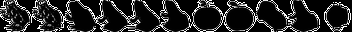

Label: frog
Average Precision for query 248:  0.38089627348622923
Precision@k for query 248:  0.6




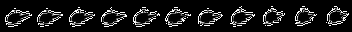

Label: chopper
Average Precision for query 249:  0.9805194805194806
Precision@k for query 249:  1.0




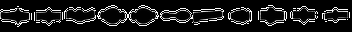

Label: watch
Average Precision for query 250:  0.5696343287038775
Precision@k for query 250:  0.5




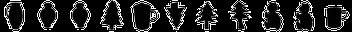

Label: jar
Average Precision for query 251:  0.21787917676646604
Precision@k for query 251:  0.2




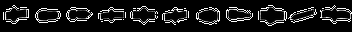

Label: watch
Average Precision for query 252:  0.35030417303019207
Precision@k for query 252:  0.5




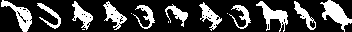

Label: guitar
Average Precision for query 253:  0.03187839120407932
Precision@k for query 253:  0.0




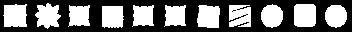

Label: device3
Average Precision for query 254:  0.6302610583860584
Precision@k for query 254:  0.7




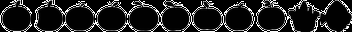

Label: apple
Average Precision for query 255:  0.6047673046891129
Precision@k for query 255:  0.8




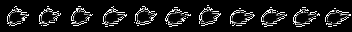

Label: chopper
Average Precision for query 256:  1.0
Precision@k for query 256:  1.0




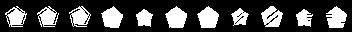

Label: device6
Average Precision for query 257:  0.7945506211322542
Precision@k for query 257:  1.0




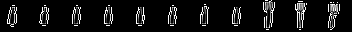

Label: bottle
Average Precision for query 258:  0.5099384779456596
Precision@k for query 258:  0.7




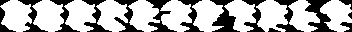

Label: Misk
Average Precision for query 259:  0.9496012228748802
Precision@k for query 259:  1.0




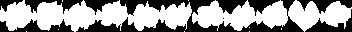

Label: fish
Average Precision for query 260:  0.6808630103685783
Precision@k for query 260:  0.9




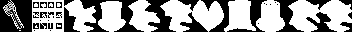

Label: fork
Average Precision for query 261:  0.013395095118819533
Precision@k for query 261:  0.0




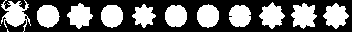

Label: beetle
Average Precision for query 262:  0.04316669307787124
Precision@k for query 262:  0.0




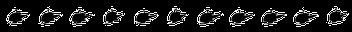

Label: chopper
Average Precision for query 263:  1.0
Precision@k for query 263:  1.0




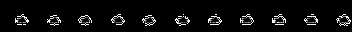

Label: truck
Average Precision for query 264:  0.8706161401165783
Precision@k for query 264:  1.0




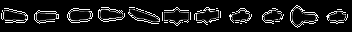

Label: pencil
Average Precision for query 265:  0.3313089406302788
Precision@k for query 265:  0.4




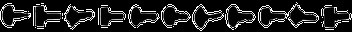

Label: key
Average Precision for query 266:  0.9786891679748823
Precision@k for query 266:  1.0




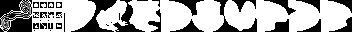

Label: spring
Average Precision for query 267:  0.0143318088489735
Precision@k for query 267:  0.0




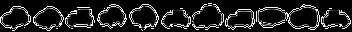

Label: personal_car
Average Precision for query 268:  0.35075385662639097
Precision@k for query 268:  0.4




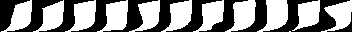

Label: Comma
Average Precision for query 269:  1.0
Precision@k for query 269:  1.0




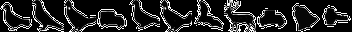

Label: bird
Average Precision for query 270:  0.2759031069842732
Precision@k for query 270:  0.4




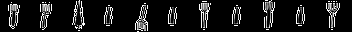

Label: fork
Average Precision for query 271:  0.34645765844827064
Precision@k for query 271:  0.5




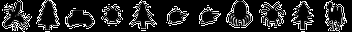

Label: fly
Average Precision for query 272:  0.020838720200440534
Precision@k for query 272:  0.0




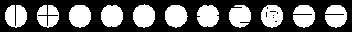

Label: device9
Average Precision for query 273:  0.82202442002442
Precision@k for query 273:  1.0




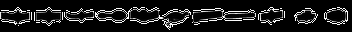

Label: watch
Average Precision for query 274:  0.40660315064804475
Precision@k for query 274:  0.4




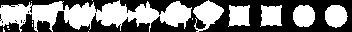

Label: cattle
Average Precision for query 275:  0.10888589032818742
Precision@k for query 275:  0.1




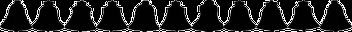

Label: bell
Average Precision for query 276:  0.8736953242835596
Precision@k for query 276:  1.0




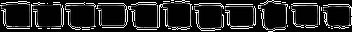

Label: cellular_phone
Average Precision for query 277:  0.9524886877828055
Precision@k for query 277:  1.0




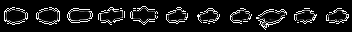

Label: jar
Average Precision for query 278:  0.1057573975304886
Precision@k for query 278:  0.1




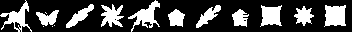

Label: horse
Average Precision for query 279:  0.04120669096131564
Precision@k for query 279:  0.1




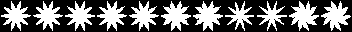

Label: device7
Average Precision for query 280:  0.9385917030567685
Precision@k for query 280:  1.0




In [60]:
# Hyperparameters
k = 10
view_option = 1

X_train, X_test, y_train, y_test, names_train, names_test = train_test_data(X, y, names)
AP, AR, precisionsatk = image_retrieval_k(X_train, X_test, names_train, names_test, k, view_option)

In [61]:
mAP = calculate_mAP(precisionsatk)
print(mAP)

0.552266602861855


In [62]:
save_as_csv(precisionsatk, AP, k)